In [1]:
from brian2 import * 

In [2]:
NE = 800
NI = 200
f = 0.1
J_f = 1.8
J_k = 0.6
K_f = 0.1 * J_f
K_K = 0.1 * J_k
w_plus = 1.5
w_minus =  1 - f*(w_plus -1)/(1-f)
w_n = (-f*J_k  - f*K_K)/(1-2*f) + w_minus 
w_prime_n = (-f*J_f  - f*K_f)/(1-2*f) + w_minus 
v_in_freq = 250 * Hz
v_bias_freq = 8 * Hz
v_ext_freq = 2.4 * kHz
V_L = -70. * mV
V_thr = -50. * mV
V_reset = -55. * mV
V_E = 0. * mV
V_I = -70. * mV

C_m_E = 0.5 * nF
C_m_I = 0.2 * nF
g_m_E = 25. * nS
g_m_I = 20. * nS

tau_rp_E = 2. * ms
tau_rp_I = 1. * ms

g_AMPA_ext_E = 2.08 * nS
g_AMPA_rec_E = 0.104 * nS 
g_AMPA_ext_I = 1.62 * nS
g_AMPA_rec_I = 0.081 * nS 
tau_AMPA = 2. * ms

g_NMDA_E = 0.327 * nS 
g_NMDA_I = 0.258 * nS 
tau_NMDA_rise = 2. * ms
tau_NMDA_decay = 100. * ms
alpha = 0.5 / ms
Mg2 = 1.

g_GABA_E = 1.287 * nS 
g_GABA_I = 1.002 * nS
tau_GABA = 10. * ms

eqs_E_s = '''
dv / dt = (- g_m_E * (v - V_L) - I_syn) / C_m_E : volt (unless refractory)
I_syn = I_AMPA_ext + I_AMPA_rec + I_NMDA_rec + I_GABA_rec : amp
I_AMPA_ext = g_AMPA_ext_E * (v - V_E) * s_AMPA_ext : amp
I_AMPA_rec = g_AMPA_rec_E * (v - V_E) * 1 * s_AMPA : amp
ds_AMPA_ext / dt = - s_AMPA_ext / tau_AMPA : 1
ds_AMPA / dt = - s_AMPA / tau_AMPA : 1
I_NMDA_rec = g_NMDA_E * (v - V_E) / (1 + Mg2 * exp(-0.062 * v / mV) / 3.57) * s_NMDA_tot : amp
s_NMDA_tot = s1 + s2 + s3 + s4 + s5  : 1
s1 : 1
s2 : 1
s3 : 1
s4 : 1
s5 : 1
I_GABA_rec = g_GABA_E * (v - V_I) * s_GABA : amp
ds_GABA / dt = - s_GABA / tau_GABA : 1
'''

eqs_E_NS = '''
dv / dt = (- g_m_E * (v - V_L) - I_syn) / C_m_E : volt (unless refractory)
I_syn = I_AMPA_ext + I_AMPA_rec + I_NMDA_rec + I_GABA_rec : amp
I_AMPA_ext = g_AMPA_ext_E * (v - V_E) * s_AMPA_ext : amp
I_AMPA_rec = g_AMPA_rec_E * (v - V_E) * 1 * s_AMPA : amp
ds_AMPA_ext / dt = - s_AMPA_ext / tau_AMPA : 1
ds_AMPA / dt = - s_AMPA / tau_AMPA : 1
I_NMDA_rec = g_NMDA_E * (v - V_E) / (1 + Mg2 * exp(-0.062 * v / mV) / 3.57) * s_NMDA_tot : amp
s_NMDA_tot = s1 +s2 : 1
s1 : 1
s2 : 1
I_GABA_rec = g_GABA_E * (v - V_I) * s_GABA : amp
ds_GABA / dt = - s_GABA / tau_GABA : 1
'''
eqs_I = '''
dv / dt = (- g_m_I * (v - V_L) - I_syn) / C_m_I : volt (unless refractory)
I_syn = I_AMPA_ext + I_AMPA_rec + I_NMDA_rec + I_GABA_rec : amp
I_AMPA_ext = g_AMPA_ext_I * (v - V_E) * s_AMPA_ext : amp
I_AMPA_rec = g_AMPA_rec_I * (v - V_E) * 1 * s_AMPA : amp
ds_AMPA_ext / dt = - s_AMPA_ext / tau_AMPA : 1
ds_AMPA / dt = - s_AMPA / tau_AMPA : 1
I_NMDA_rec = g_NMDA_I * (v - V_E) / (1 + Mg2 * exp(-0.062 * v / mV) / 3.57) * s_NMDA_tot : amp
s_NMDA_tot = s1 + s2 +s3  : 1
s1 : 1
s2 : 1
s3 : 1
I_GABA_rec = g_GABA_I * (v - V_I) * s_GABA : amp
ds_GABA / dt = - s_GABA / tau_GABA : 1
'''

s_11 = NeuronGroup(f*NE, eqs_E_s, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_E, method='euler',name='selective_pool_1_in_layer_1')
s_21 = NeuronGroup(f*NE, eqs_E_s, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_E, method='euler',name='selective_pool_2_in_layer_1')
NS_1 = NeuronGroup(240, eqs_E_NS, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_E, method='euler',name='Non_specific_pool_1_in_layer_1')
I_1 = NeuronGroup(NI/2, eqs_I, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_I, method='euler',name='Inhibitory_pool_1_in_layer_1')
s_11.v = V_L
s_21.v = V_L
NS_1.v = V_L
I_1.v = V_L

s_12 = NeuronGroup(f*NE, eqs_E_s, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_E, method='euler' ,name='selective_pool_1_in_layer_2')
s_22 = NeuronGroup(f*NE, eqs_E_s, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_E, method='euler' ,name='selective_pool_2_in_layer_2')
NS_2 = NeuronGroup(240, eqs_E_NS, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_E, method='euler'  ,name='Non_specific_pool_1_in_layer_2')
I_2 = NeuronGroup(NI/2, eqs_I, threshold='v > V_thr', reset='v = V_reset',refractory=tau_rp_I, method='euler'  ,name='Inhibitory_pool_1_in_layer_2')
s_12.v = V_L
s_22.v = V_L
NS_2.v = V_L
I_2.v = V_L

eqs_glut_1 = '''
s1_post =    w * s_NMDA : 1 (summed)
ds_NMDA / dt = - s_NMDA / tau_NMDA_decay + alpha * x * (1 - s_NMDA) : 1 (clock-driven)
dx / dt = - x / tau_NMDA_rise : 1 (clock-driven)
w : 1
'''
eqs_glut_2 = '''
s2_post =    w * s_NMDA : 1 (summed)
ds_NMDA / dt = - s_NMDA / tau_NMDA_decay + alpha * x * (1 - s_NMDA) : 1 (clock-driven)
dx / dt = - x / tau_NMDA_rise : 1 (clock-driven)
w : 1
'''
eqs_glut_3 = '''
s3_post =    w * s_NMDA : 1 (summed)
ds_NMDA / dt = - s_NMDA / tau_NMDA_decay + alpha * x * (1 - s_NMDA) : 1 (clock-driven)
dx / dt = - x / tau_NMDA_rise : 1 (clock-driven)
w : 1
'''
eqs_glut_4 = '''
s4_post =    w * s_NMDA : 1 (summed)
ds_NMDA / dt = - s_NMDA / tau_NMDA_decay + alpha * x * (1 - s_NMDA) : 1 (clock-driven)
dx / dt = - x / tau_NMDA_rise : 1 (clock-driven)
w : 1
'''
eqs_glut_5 = '''
s5_post =    w * s_NMDA : 1 (summed)
ds_NMDA / dt = - s_NMDA / tau_NMDA_decay + alpha * x * (1 - s_NMDA) : 1 (clock-driven)
dx / dt = - x / tau_NMDA_rise : 1 (clock-driven)
w : 1
'''



eqs_pre_glut = '''
s_AMPA += w
x += 1
'''
eqs_pre_gaba = '''
s_GABA += 1
'''
eqs_pre_ext = '''
s_AMPA_ext += 1
'''

In [3]:
# E to E  connections
EE_11 = Synapses(s_11, s_11, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')
EE_21 = Synapses(s_21, s_21, model=eqs_glut_5, on_pre=eqs_pre_glut, method='euler')
EE_12 = Synapses(s_12, s_12, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')
EE_22 = Synapses(s_22, s_22, model=eqs_glut_5, on_pre=eqs_pre_glut, method='euler')
EE_11.connect('i != j')
EE_21.connect('i != j')
EE_12.connect('i != j')
EE_22.connect('i != j')
EE_11.w[:] = w_plus
EE_21.w[:] = w_plus
EE_12.w[:] = w_plus
EE_22.w[:] = w_plus


# I to I connections 
II_1 = Synapses(I_1, I_1, on_pre=eqs_pre_gaba, method='euler')
II_2 = Synapses(I_2, I_2, on_pre=eqs_pre_gaba, method='euler')
II_1.connect('i != j')
II_2.connect('i != j')

# I to NS connections 
INS_1 = Synapses(I_1, NS_1, on_pre=eqs_pre_gaba, method='euler')
INS_2 = Synapses(I_2, NS_2, on_pre=eqs_pre_gaba, method='euler')
INS_1.connect()
INS_2.connect()

# NS to I connections 
NSI_1 = Synapses(NS_1, I_1, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')
NSI_2 = Synapses(NS_2, I_2, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')
NSI_1.connect()
NSI_2.connect()

# E to NS
E11_NS1 = Synapses(s_11, NS_1, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')
E21_NS1 = Synapses(s_21, NS_1, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')
E12_NS2 = Synapses(s_12, NS_2, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')
E22_NS2 = Synapses(s_22, NS_2, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')
E11_NS1.connect()
E21_NS1.connect()
E12_NS2.connect()
E22_NS2.connect()

E11_NS1.w[:] = 1
E21_NS1.w[:] = 1
E12_NS2.w[:] = 1
E22_NS2.w[:] = 1

# NS to E connections 
NS1_E11 = Synapses(NS_1, s_11, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')
NS1_E21 = Synapses(NS_1, s_21, model=eqs_glut_4, on_pre=eqs_pre_glut, method='euler')
NS2_E12 = Synapses(NS_2, s_12, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')
NS2_E22 = Synapses(NS_2, s_22, model=eqs_glut_4, on_pre=eqs_pre_glut, method='euler')

NS1_E11.connect()
NS1_E21.connect()
NS2_E12.connect()
NS2_E22.connect()

NS1_E11.w[:] = w_n
NS1_E21.w[:] = w_n
NS2_E12.w[:] = w_prime_n
NS2_E22.w[:] = w_prime_n

# E to I 
E11_I1 = Synapses(s_11,I_1, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')
E21_I1 = Synapses(s_21,I_1, model=eqs_glut_3, on_pre=eqs_pre_glut, method='euler')
E12_I2 = Synapses(s_12,I_2, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')
E22_I2 = Synapses(s_22,I_2, model=eqs_glut_3, on_pre=eqs_pre_glut, method='euler')

E11_I1.connect()
E21_I1.connect()
E12_I2.connect()
E22_I2.connect()

E11_I1.w[:] = 1
E21_I1.w[:] = 1
E12_I2.w[:] = 1
E22_I2.w[:] = 1

# I to E 
eqs_wI = """
s_GABA += 1 
"""
eqs_wI_prime = """
s_GABA += 1.35
"""
I1_E11 = Synapses(I_1, s_11, on_pre=eqs_wI, method='euler')
I1_E21 = Synapses(I_1, s_21, on_pre=eqs_wI, method='euler')
I2_E13 = Synapses(I_2, s_12, on_pre=eqs_wI_prime, method='euler')
I2_E22 = Synapses(I_2, s_22, on_pre=eqs_wI_prime, method='euler')

I1_E11.connect()
I1_E21.connect()
I2_E13.connect()
I2_E22.connect()

# s to s 
s11_s21 = Synapses(s_11, s_21, model=eqs_glut_3, on_pre=eqs_pre_glut, method='euler')
s21_s11 = Synapses(s_21, s_11, model=eqs_glut_3, on_pre=eqs_pre_glut, method='euler')
s12_s22 = Synapses(s_12, s_22, model=eqs_glut_3, on_pre=eqs_pre_glut, method='euler')
s22_s12 = Synapses(s_22, s_12, model=eqs_glut_3, on_pre=eqs_pre_glut, method='euler')

s11_s21.connect()
s21_s11.connect()
s12_s22.connect()
s22_s12.connect()


s11_s21.w[:] = w_minus
s21_s11.w[:] = w_minus
s12_s22.w[:] = w_minus
s22_s12.w[:] = w_minus

# layer 1 to layer 2 parallel 
s11_s12 = Synapses(s_11, s_12, model=eqs_glut_4, on_pre=eqs_pre_glut, method='euler')
s12_s11 = Synapses(s_12, s_11, model=eqs_glut_4, on_pre=eqs_pre_glut, method='euler')
s21_s22 = Synapses(s_21, s_22, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')
s22_s21 = Synapses(s_22, s_21, model=eqs_glut_2, on_pre=eqs_pre_glut, method='euler')

s11_s12.connect()
s12_s11.connect()
s21_s22.connect()
s22_s21.connect()

s11_s12.w[:] = J_f
s12_s11.w[:] = J_k
s21_s22.w[:] = J_f
s22_s21.w[:] = J_k

#layer 1 to layer 2 cross 
s11_s22 = Synapses(s_11, s_22, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')
s22_s11 = Synapses(s_22, s_11, model=eqs_glut_5, on_pre=eqs_pre_glut, method='euler')
s21_s12 = Synapses(s_21, s_12, model=eqs_glut_5, on_pre=eqs_pre_glut, method='euler')
s12_s21 = Synapses(s_12, s_21, model=eqs_glut_1, on_pre=eqs_pre_glut, method='euler')

s11_s22.connect()
s22_s11.connect()
s21_s12.connect()
s12_s21.connect()

s11_s22.w[:] = K_f
s22_s11.w[:] = K_K
s21_s12.w[:] = K_f
s12_s21.w[:] = K_K

cl : Command line warning D9025 : overriding '/W3' with '/w'
WARNING    Cannot use Cython, a test compilation failed: command 'C:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\BIN\\x86_amd64\\cl.exe' failed with exit status 2 (CompileError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


_cython_magic_673c9c298d72380be4f978b7507636fd.cpp
c:\users\mohammad reza\appdata\local\programs\python\python38\include\pyconfig.h(205): fatal error C1083: Cannot open include file: 'basetsd.h': No such file or directory


In [4]:
## Input to the network 

# external input 
ext_rate  = 3 * Hz
ext_number = 800
Vext_s11 = PoissonInput(s_11, 's_AMPA_ext', ext_number, ext_rate,'1')
Vext_s21 = PoissonInput(s_21, 's_AMPA_ext', ext_number, ext_rate,'1')
Vext_s12 = PoissonInput(s_12, 's_AMPA_ext', ext_number, ext_rate,'1')
Vext_s22 = PoissonInput(s_22, 's_AMPA_ext', ext_number, ext_rate,'1')
Vext_NS1 = PoissonInput(NS_1, 's_AMPA_ext', ext_number, ext_rate,'1')
Vext_NS2 = PoissonInput(NS_2, 's_AMPA_ext', ext_number, ext_rate,'1')
Vext_I1 = PoissonInput(I_1, 's_AMPA_ext', ext_number, ext_rate,'1')
Vext_I1 = PoissonInput(I_2, 's_AMPA_ext', ext_number, ext_rate,'1')

# V In input
time1 =  TimedArray(np.r_[np.zeros(40), np.ones(280)], dt=25 * ms)
Vin_s11 = PoissonInput(s_11, 's_AMPA_ext', 1, 250 * Hz,'time1(t)')
vin_s21 = PoissonInput(s_21, 's_AMPA_ext', 1, 250 * Hz,'time1(t)')

# V bias
time2 =  TimedArray(np.r_[np.zeros(40), np.ones(80),np.zeros(40),4*np.ones(80),np.zeros(40),8*np.ones(80)], dt=25 * ms)
vbias_s11  = PoissonInput(s_11, 's_AMPA_ext', f*NE, 8 * Hz, 'time2(t)')





In [5]:
s = SpikeMonitor(s_11[:20])
r = PopulationRateMonitor(s_11[:20])
v =  StateMonitor(s_11[:20],'v',record = True)
net = Network(collect())
net.add(r)    
net.run(10* second,'text')

Starting simulation at t=0. s for a duration of 10. s
80.5 ms (0%) simulated in 10s, estimated 20m 33s remaining.
152.2 ms (1%) simulated in 20s, estimated 21m 35s remaining.
208. ms (2%) simulated in 30s, estimated 23m 34s remaining.
262.2 ms (2%) simulated in 40s, estimated 24m 47s remaining.
0.3295 s (3%) simulated in 50s, estimated 24m 29s remaining.
0.4024 s (4%) simulated in 1m 0s, estimated 23m 53s remaining.
0.4736 s (4%) simulated in 1m 10s, estimated 23m 29s remaining.
0.5411 s (5%) simulated in 1m 20s, estimated 23m 20s remaining.
0.6048 s (6%) simulated in 1m 30s, estimated 23m 19s remaining.
0.6788 s (6%) simulated in 1m 40s, estimated 22m 55s remaining.
0.7473 s (7%) simulated in 1m 50s, estimated 22m 43s remaining.
0.8124 s (8%) simulated in 2m 0s, estimated 22m 39s remaining.
0.8833 s (8%) simulated in 2m 10s, estimated 22m 23s remaining.
0.9572 s (9%) simulated in 2m 20s, estimated 22m 4s remaining.
1.0313 s (10%) simulated in 2m 30s, estimated 21m 46s remaining.
1.104

In [9]:
LFP = np.zeros((100000)) 
for i in range(0,20):
    LFP += v.v[i]/20

def sta_calculator(lfp,spike_trains,N):
    lfp = array(lfp)
    spike_trains = array(spike_trains) * 1000
    sta = np.zeros(2*N)
    for spike_time in spike_trains:
        if spike_time > N  and spike_time<len(lfp) - N  :
            sta += lfp[int(spike_time)-N:int(spike_time)+N] / len(spike_trains)
            #print(int(spike_time)-100 - (int(spike_time)+ 100))
    return sta



In [10]:
from scipy.signal import welch

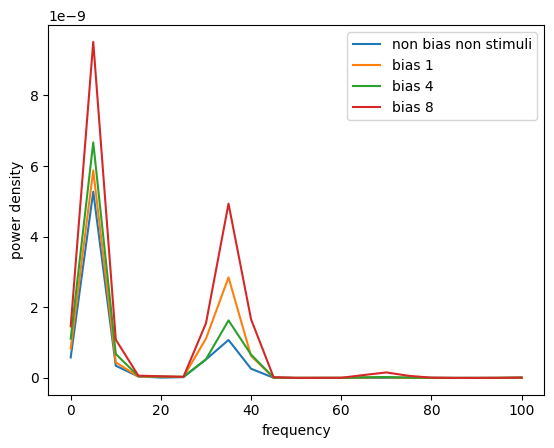

In [11]:
N = 300
# effect of v bias on gamma frequency 
STA = zeros(2*N)
for i in range(0,20):    
    spike_trains = s.spike_trains()[i]
    STA += sta_calculator(LFP[:10000],spike_trains,N)
f,p = welch(STA,fs = 1000,nperseg=200)
plt.plot(f[:21],p[:21])

for i in range(0,20):    
    spike_trains = s.spike_trains()[i]
    STA += sta_calculator(LFP[10000:30000],spike_trains,N)
f,p = welch(STA,fs = 1000,nperseg=200)
plt.plot(f[:21],p[:21])

for i in range(0,20):    
    spike_trains = s.spike_trains()[i]
    STA += sta_calculator(LFP[40000:60000],spike_trains,N)
f,p = welch(STA,fs = 1000,nperseg=200)
plt.plot(f[:21],p[:21])

for i in range(0,20):    
    spike_trains = s.spike_trains()[i]
    STA += sta_calculator(LFP[70000:90000],spike_trains,N)
f,p = welch(STA,fs = 1000,nperseg=200)
plt.plot(f[:21],p[:21])

plt.legend(['non bias non stimuli','bias 1','bias 4','bias 8'])
plt.xlabel('frequency')
plt.ylabel('power density')

plt.show()


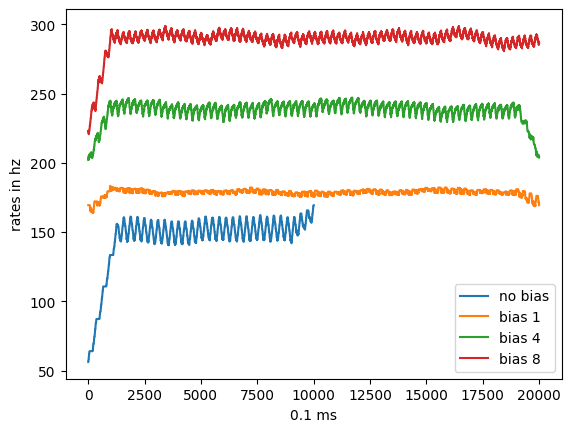

In [23]:
# population rate in v bias 
plt.plot(r.smooth_rate('flat',200 * ms)[:10000])

plt.plot(r.smooth_rate('flat',200 * ms)[10000:30000])
plt.plot(r.smooth_rate('flat',200 * ms)[40000:60000])
plt.plot(r.smooth_rate('flat',200 * ms)[70000:90000])
plt.xlabel('0.1 ms')
plt.ylabel('rates in hz')
plt.legend(['no bias','bias 1','bias 4','bias 8'])

Text(0, 0.5, 'STA LFP')

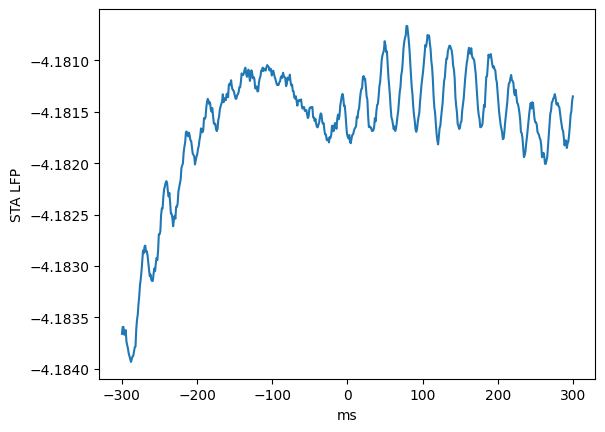

In [27]:
plt.plot(linspace(-300,300,600),STA)
xlabel('ms')
ylabel('STA LFP')
